In [1]:
import requests
from bs4 import BeautifulSoup
import time
from tqdm.notebook import tqdm
from time import sleep

In [24]:
from IPython.display import display, HTML

In [14]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
!pip install pyLDAvis
import pyLDAvis.gensim_models

In [3]:
!pip install pymorphy2
import pymorphy2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
!pip install -U gensim
from gensim.models import *
from gensim import corpora

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)


In [5]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import re

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
stop_words = set(stopwords.words('russian'))
lemmatiser = WordNetLemmatizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Тот парсер сильно замороченный, сделал попроще. Из коллаба роспотребнадзор не отвечает, парсить надо с локальной машины. В цикле for i в range надо указать номера обращений, они там просто по порядку, но некоторых страниц нехватает, поэтому через try-except

In [ ]:
# можно не запускать, сайт роспотреба все равно не ответит
'''
questions = []
lost_counter = 0

for page in tqdm(range(38350, 39350), desc='Pages'):
    url = 'https://zpp.rospotrebnadzor.ru/Forum/Appeals/Details/'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 YaBrowser/23.1.2.931 Yowser/2.5 Safari/537.36'
    }
    res = requests.get(f'{url}{page}')
    soup = BeautifulSoup(res.text)
    try:
        question = soup.find('p', {'class':'appeal-details-message'}).text
        questions.append(question)
    except AttributeError:
        lost_counter += 1
    sleep(0.5)
print(f'Страниц потеряно: {lost_counter}')
print(f'Страниц собрано: {len(questions)}')
'''

Страниц потеряно: 231
Страниц собрано: 769

In [8]:
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving questions_list.ob to questions_list (1).ob


In [9]:
import pickle
with open ('/content/questions_list.ob', 'rb') as fp:
    questions = pickle.load(fp)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
questions[42]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Добрый вечер, Валдбериз, не возвращает средства, списанные за обратную доставку бракованного товара, заказывала 3 раза! В надежде, что придут без брака , сковородки, но присылали 1 оаз качественный товар, а еще 2 раза ( хотела купить еще 5 сковородок) с браком крепежа ручек, необдноскратно писала обращения в личном кабинете, на их официальную почту, напрямую продавцу через личный кабинет, отвечает чат борт, что возврат за обратную дрставку с браком будут возвращать, но, механизм еще не отлажен, написала им заявление по форме на возврат средств....ответа нет, прошу помочь, как вернуть , списанные ни за что средства.... я много лет клиент этого сервиса и с таким сталкиваюсь впервые...3 месяца пыталась вернут деньги....общаясь с валдбериз'

In [11]:
emoticon_dict = {
":)": "happy",
":-)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
morph = pymorphy2.MorphAnalyzer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.10/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.10/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Py

In [44]:
def clean_text(text):
  text = re.sub('@[\w]*', '', text)
  text = text.lower()
  text = re.sub(r'[^\w\s]', ' ', text)
  text = re.sub(r'[^а-яА-Я]', ' ', text)
  text = " ".join([w for w in text.split() if (len(w) > 3) and len(w) < 11])
  text = ' '.join(emoticon_dict[word] if word in emoticon_dict.keys() else word for word in text.split())
  text = [w for w in text.split() if w not in stop_words]
  #text = set([morph.parse(w)[0].normal_form for w in text])
  text = [morph.parse(w)[0].normal_form for w in text]
  return text

In [45]:
%time
clean_text(questions[42]) #долго

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


['добрый',
 'вечер',
 'валдбериз',
 'возвращать',
 'средство',
 'списать',
 'обратный',
 'доставка',
 'товар',
 'заказывать',
 'раз',
 'надежда',
 'прийти',
 'брак',
 'сковородка',
 'присылать',
 'товар',
 'раз',
 'хотеть',
 'купить',
 'сковородка',
 'брак',
 'крепёж',
 'ручка',
 'писать',
 'обращение',
 'личный',
 'кабинет',
 'почта',
 'напрямую',
 'продавец',
 'личный',
 'кабинет',
 'отвечать',
 'борт',
 'возврат',
 'обратный',
 'дрставка',
 'брак',
 'быть',
 'возвращать',
 'механизм',
 'отладить',
 'написать',
 'заявление',
 'форма',
 'возврат',
 'средство',
 'ответ',
 'просить',
 'помочь',
 'вернуть',
 'списать',
 'средство',
 'клиент',
 'сервис',
 'такой',
 'впервые',
 'месяц',
 'пытаться',
 'вернуть',
 'деньга',
 'общаться',
 'валдбериз']

In [46]:
preprocessed_questions = [clean_text(text) for text in questions]

In [47]:
preprocessed_questions[42]

['добрый',
 'вечер',
 'валдбериз',
 'возвращать',
 'средство',
 'списать',
 'обратный',
 'доставка',
 'товар',
 'заказывать',
 'раз',
 'надежда',
 'прийти',
 'брак',
 'сковородка',
 'присылать',
 'товар',
 'раз',
 'хотеть',
 'купить',
 'сковородка',
 'брак',
 'крепёж',
 'ручка',
 'писать',
 'обращение',
 'личный',
 'кабинет',
 'почта',
 'напрямую',
 'продавец',
 'личный',
 'кабинет',
 'отвечать',
 'борт',
 'возврат',
 'обратный',
 'дрставка',
 'брак',
 'быть',
 'возвращать',
 'механизм',
 'отладить',
 'написать',
 'заявление',
 'форма',
 'возврат',
 'средство',
 'ответ',
 'просить',
 'помочь',
 'вернуть',
 'списать',
 'средство',
 'клиент',
 'сервис',
 'такой',
 'впервые',
 'месяц',
 'пытаться',
 'вернуть',
 'деньга',
 'общаться',
 'валдбериз']

In [48]:
dictionary = corpora.Dictionary(preprocessed_questions)

dictionary.filter_extremes(no_below = 10, no_above = 0.9, keep_n=None)
dictionary.save('rospotreb.dict')

corpus = [dictionary.doc2bow(text) for text in preprocessed_questions]
corpora.MmCorpus.serialize('rospotreb.model', corpus)

In [49]:
dictionary[42]

'сегодня'

In [50]:
corpus[42]

[(1, 1),
 (2, 1),
 (9, 1),
 (13, 1),
 (17, 1),
 (18, 1),
 (20, 3),
 (22, 2),
 (28, 1),
 (38, 1),
 (58, 1),
 (68, 2),
 (70, 2),
 (77, 2),
 (80, 2),
 (81, 1),
 (82, 1),
 (96, 1),
 (116, 1),
 (129, 1),
 (185, 2),
 (221, 1),
 (296, 1),
 (314, 1),
 (322, 1),
 (326, 1),
 (339, 1),
 (342, 2),
 (346, 3),
 (349, 1),
 (426, 1),
 (438, 1),
 (443, 2),
 (444, 1),
 (445, 2),
 (446, 1),
 (447, 1)]

In [104]:
%time
lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=3, chunksize=50, passes=5, update_every=1)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


In [105]:
lda.show_topics(num_topics=3, num_words=10, formatted=True)

[(0,
  '0.023*"просить" + 0.023*"услуга" + 0.018*"адрес" + 0.017*"вода" + 0.015*"дом" + 0.013*"дать" + 0.012*"который" + 0.011*"день" + 0.011*"работа" + 0.009*"свой"'),
 (1,
  '0.030*"заказ" + 0.026*"товар" + 0.024*"деньга" + 0.019*"день" + 0.019*"карта" + 0.014*"возврат" + 0.013*"доставка" + 0.011*"оплата" + 0.011*"сказать" + 0.011*"средство"'),
 (2,
  '0.049*"товар" + 0.045*"магазин" + 0.023*"возврат" + 0.022*"продавец" + 0.012*"вернуть" + 0.011*"данный" + 0.011*"цена" + 0.011*"обувь" + 0.011*"купить" + 0.010*"право"')]

In [106]:
lda_vis_data = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(lda_vis_data, 'lda_visualization.html')

lda_visualization_path = 'lda_visualization.html'

# Открываем и отображаем визуализацию LDA
with open(lda_visualization_path, 'r') as f:
    html_content = f.read()
    display(HTML(html_content))

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

topics_list = [1, 2, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
coherences = []
perplexities = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=preprocessed_questions, dictionary=dictionary, coherence='c_v').get_coherence())
    perplexities.append(lda.log_perplexity(corpus))

  0%|          | 0/13 [00:00<?, ?it/s]

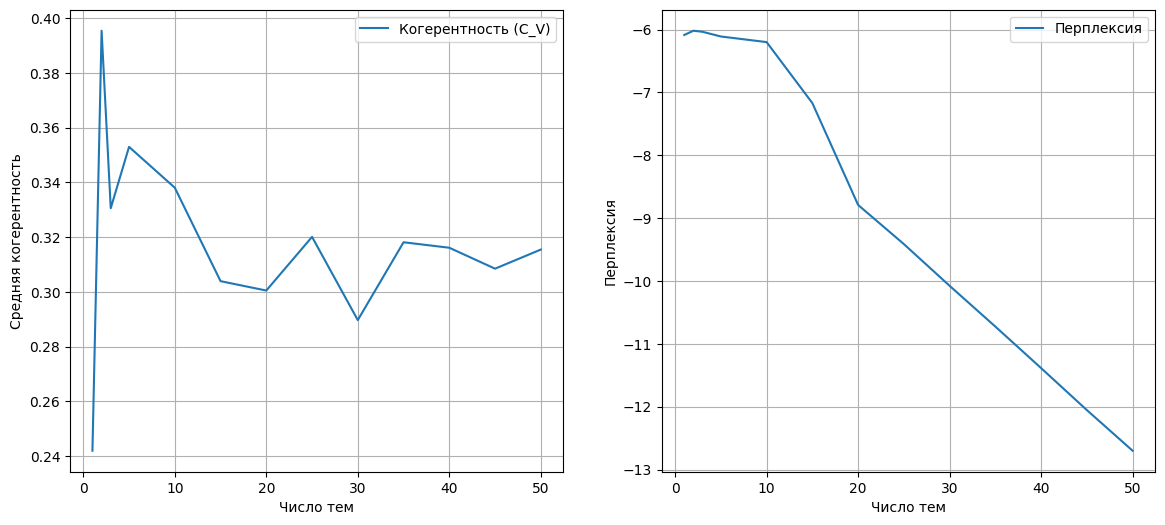

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))
# График когерентности
axs[0].plot(topics_list, coherences, label="Когерентность (C_V)")
axs[0].set_xlabel("Число тем")
axs[0].set_ylabel("Средняя когерентность")
axs[0].legend()
axs[0].grid()

# График перплексии
axs[1].plot(topics_list, perplexities, label="Перплексия")
axs[1].set_xlabel("Число тем")
axs[1].set_ylabel("Перплексия")
axs[1].legend()
axs[1].grid()

plt.show()

Я эксперементировал с разным количеством тем. Исходя из простого логического анализа - это сайт роспотребнадзора, соответственно в обращениях будут жалобы. Жаловаться могут на некачетсвенную услугу, некачественный товар или могут быть обращения не по адресу. Примерно на такое количество тем указывает когерентность, хотя при этом высокий уровень неопределенности, что в целом логично при таком малом наборе тем. Я так понимаю чем больше тем, тем меньше вариативность внутри одной темы, тем ниже перплексия, но в реальной жизни это не всегда правильно. Я бы разделил все тексты датасета на две категории - жалоба на товар и жалоба на услугу, с человеческой точки зрения это наиболее точное распределение, хотя внутри тех же услуг могут быть разные ветви - медицина, коммуналка, бытовые услуги и т.д.

Попробуем с биграммами

In [107]:
bigram = Phrases(preprocessed_questions, min_count=3, threshold=10)

# Обработка текстов вопросов с биграммами
texts_bigrams = [bigram[q] for q in preprocessed_questions]

# Создание словаря и корпуса для биграмм:
dictionary_bigram = corpora.Dictionary(texts_bigrams)
corpus_bigram = [dictionary_bigram.doc2bow(text) for text in texts_bigrams]

In [97]:
dictionary_bigram[42]

'отправить'

In [108]:
num_topics = 3  # Количество тематик для биграмм
lda_model_bigram = ldamodel.LdaModel(corpus=corpus_bigram, id2word=dictionary_bigram, num_topics=num_topics, chunksize=50, passes=5, update_every=1, random_state=42)

In [109]:
lda_vis_data_bigram = pyLDAvis.gensim_models.prepare(lda_model_bigram, corpus_bigram, dictionary_bigram)
pyLDAvis.save_html(lda_vis_data_bigram, 'lda_bigram_visualization.html')
lda_bigram_visualization_path = 'lda_bigram_visualization.html'
with open(lda_bigram_visualization_path, 'r') as f:
    html_content = f.read()
    display(HTML(html_content))

Разница не велика. При большом количестве тем - большое пересечение между темами, плохая кластеризация. Чем меньше тем лучше кластеризация и больше расстояние между темами

In [110]:
perplexity = lda.log_perplexity(corpus)
perplexity_bigram = lda_model_bigram.log_perplexity(corpus_bigram)
print("Perplexity (Unigram):", perplexity)
print("Perplexity (Bigram):", perplexity_bigram)

Perplexity (Unigram): -6.017789801463026
Perplexity (Bigram): -7.82446323511659


Биграммы справильсь чуть лучше, раз у них степень неопределнности чуть меньше. Но разница не драматична

In [111]:
from gensim.models import CoherenceModel

coherence_model_unigram = CoherenceModel(model=lda, texts=preprocessed_questions, dictionary=dictionary, coherence='u_mass') # так как с_v для биграмм не работает
coherence_unigram = coherence_model_unigram.get_coherence()
print("Coherence (Unigram):", coherence_unigram)

coherence_model_bigram = CoherenceModel(model=lda_model_bigram, texts=preprocessed_questions, dictionary=dictionary_bigram, coherence='u_mass') # так как с_v для биграмм не работает
coherence_bigram = coherence_model_bigram.get_coherence()
print("Coherence (Bigram):", coherence_bigram)

Coherence (Unigram): -1.7957641329391414
Coherence (Bigram): -3.3802024255101375


зато когерентность чуть хуже у биграмм, чего и следовало ожидать. Хотя и у монограмм ноже невелика. С одной стороны это может указывать на плохое качество работы модели, с другой стороны при таком малом наборе тем это должно быть нормально

Судя по таблицам релевантности слов среди тем мое предположение о тематике обращений на сайт роспотреба обказалось вполне правлоподобным. Топ-3 слов среди тем:
 1) товар, магазин, возврат
 2) услуга, который, дать
 3) территория, ребенок, адрес.

То есть тема номер один - плохой товар, номер два - плохая услуга, номер три - обращение не по адресу.